Classification of MNIST Digits with SVD Decomposition

1)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io

In [3]:
data = scipy.io.loadmat('MNIST.mat')
X = data['X']
I = data['I']
print('The shape of X is', X.shape)
print('The shape of y is', I.shape)

The shape of X is (256, 1707)
The shape of y is (1, 1707)


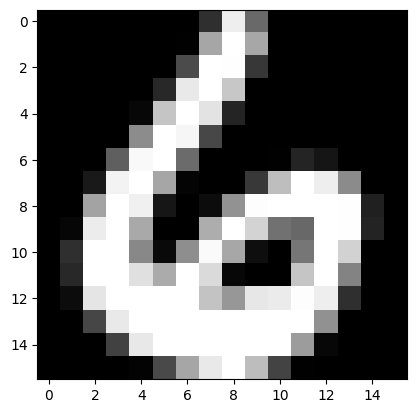

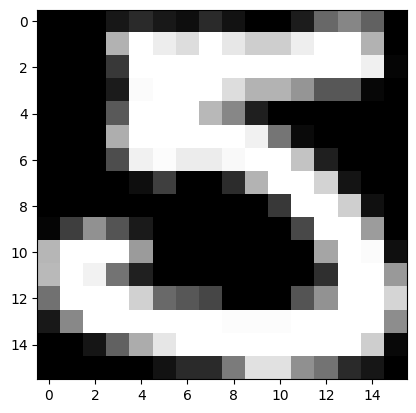

In [4]:
# Visualize some datapoints
image0 = X[:, 0]
image0 = np.reshape(image0, (16,16))
plt.imshow(image0, cmap='gray')
plt.show()

image1 = X[:, 1]
image1 = np.reshape(image1, (16,16))
plt.imshow(image1, cmap='gray')
plt.show()

## Digits 3 and 4

In [5]:
num1 = 3
num2 = 4

# Extract from X the columns that corresponds to num1 or num2
idx = (I[0, :] == num1) | (I[0, :] == num2)
Yn12 = I[:, idx]
Xn12 = X[:, idx]
N12 = Xn12.shape[1]
Ntrain = int(N12/3 * 2)

idxC1 = Yn12[0, :] == num1
Y1 = Yn12[:, idxC1]
X1 = Xn12[:, idxC1]
idxC2 = Yn12[0, :] == num2
Y2 = Yn12[:, idxC2]
X2 = Xn12[:, idxC2]

print(Y1.shape, Y2.shape, X1.shape, X2.shape)
print(Xn12.shape, Yn12.shape)

(1, 131) (1, 122) (256, 131) (256, 122)
(256, 253) (1, 253)


In [6]:
def train_test_split(X,Y,N_train):
    d, N = X.shape
    #define the array of indices
    idx = np.arange(0,N)
    
    
    #shuffle the indices
    np.random.shuffle(idx)
    
    #extract train and test indices
    train_idx = idx[:N_train]
    test_idx = idx[N_train:]
    
    #extract data
    X_train = X[:, train_idx]
    Y_train = Y[:, train_idx]
    
    X_test = X[:, test_idx]
    Y_test = Y[:, test_idx]

    return (X_train, Y_train), (X_test, Y_test)

In [7]:
(X_train, Y_train), (X_test, Y_test) = train_test_split(Xn12, Yn12, Ntrain)

print(X_train.shape, X_test.shape)

(256, 168) (256, 85)


In [8]:
idxC1_train = (Y_train[0, :] == num1)
idxC2_train = (Y_train[0, :] == num2)
X1_train = X_train[:, idxC1_train]
X2_train = X_train[:, idxC2_train]

In [9]:
U1, s1, VT1 = np.linalg.svd(X1_train, full_matrices=False)
U2, s2, VT2 = np.linalg.svd(X2_train, full_matrices=False)

In [10]:
m, n = Y_test.shape
index = np.random.randint(0, n)
y = X_test[:, index]
print('True number:', Y_test[:, index])
y1_p = U1 @ (U1.T @ y)
y2_p = U2 @ (U2.T @ y)

True number: [4]


In [11]:
d1 = np.linalg.norm(y - y1_p, 2)
d2 = np.linalg.norm(y - y2_p, 2)

if d1 < d2:
    print('y has been classified as a', num1, '(C1)')
else:
    print('y has been classified as a', num2, '(C2)')

y has been classified as a 4 (C2)


In [12]:
wrong = count = 0

print('##### TRAIN SET #####')

for i in range(X_train.shape[1]):
    y = X_train[:, i]
    y1_p = U1 @ (U1.T @ y)
    y2_p = U2 @ (U2.T @ y)
    d1 = np.linalg.norm(y - y1_p, 2)
    d2 = np.linalg.norm(y - y2_p, 2)
    if (Y_train[:, i] == num1) | (Y_train[:, i] == num2):
        count += 1
        if d1 < d2:
            if (Y_train[:, i] != num1):
                wrong += 1
        else:
            if (Y_train[:, i] != num2):
                wrong += 1

print(f'Number of elements: {count}')
print(f'Number of misclassified elements: {wrong}')
print(f'Accuracy: {1 - (wrong/count)}')

print('\n')

wrong = count = 0

print('##### TEST SET #####')

for i in range(X_test.shape[1]):
    y = X_test[:, i]
    y1_p = U1 @ (U1.T @ y)
    y2_p = U2 @ (U2.T @ y)
    d1 = np.linalg.norm(y - y1_p, 2)
    d2 = np.linalg.norm(y - y2_p, 2)
    if (Y_test[:, i] == num1) | (Y_test[:, i] == num2):
        count += 1
        if d1 < d2:
            if (Y_test[:, i] != num1):
                wrong += 1
        else:
            if (Y_test[:, i] != num2):
                wrong += 1

print(f'Number of elements: {count}')
print(f'Number of misclassified elements: {wrong}')
print(f'Accuracy: {1 - (wrong/count)}')

##### TRAIN SET #####
Number of elements: 168
Number of misclassified elements: 0
Accuracy: 1.0


##### TEST SET #####
Number of elements: 85
Number of misclassified elements: 1
Accuracy: 0.9882352941176471


## Digits 0 and 8

In [17]:
X = data['X']
I = data['I']

num1 = 0
num2 = 8

# Extract from X the columns that corresponds to num1 or num2
idx = (I[0, :] == num1) | (I[0, :] == num2)
Yn12 = I[:, idx]
Xn12 = X[:, idx]
N12 = Xn12.shape[1]
Ntrain = int(N12/3 * 2)

idxC1 = Yn12[0, :] == num1
Y1 = Yn12[:, idxC1]
X1 = Xn12[:, idxC1]
idxC2 = Yn12[0, :] == num2
Y2 = Yn12[:, idxC2]
X2 = Xn12[:, idxC2]

(X_train, Y_train), (X_test, Y_test) = train_test_split(Xn12, Yn12, Ntrain)
idxC1_train = (Y_train[0, :] == num1)
idxC2_train = (Y_train[0, :] == num2)
X1_train = X_train[:, idxC1_train]
X2_train = X_train[:, idxC2_train]

U1, s1, VT1 = np.linalg.svd(X1_train, full_matrices=False)
U2, s2, VT2 = np.linalg.svd(X2_train, full_matrices=False)

wrong = count = 0

print('##### TRAIN SET #####')

for i in range(X_train.shape[1]):
    y = X_train[:, i]
    y1_p = U1 @ (U1.T @ y)
    y2_p = U2 @ (U2.T @ y)
    d1 = np.linalg.norm(y - y1_p, 2)
    d2 = np.linalg.norm(y - y2_p, 2)
    if (Y_train[:, i] == num1) | (Y_train[:, i] == num2):
        count += 1
        if d1 < d2:
            if (Y_train[:, i] != num1):
                wrong += 1
        else:
            if (Y_train[:, i] != num2):
                wrong += 1

print(f'Number of elements: {count}')
print(f'Number of misclassified elements: {wrong}')
print(f'Accuracy: {1 - (wrong/count)}')

print('\n')

wrong = count = 0

print('##### TEST SET #####')

for i in range(X_test.shape[1]):
    y = X_test[:, i]
    y1_p = U1 @ (U1.T @ y)
    y2_p = U2 @ (U2.T @ y)
    d1 = np.linalg.norm(y - y1_p, 2)
    d2 = np.linalg.norm(y - y2_p, 2)
    if (Y_test[:, i] == num1) | (Y_test[:, i] == num2):
        count += 1
        if d1 < d2:
            if (Y_test[:, i] != num1):
                wrong += 1
        else:
            if (Y_test[:, i] != num2):
                wrong += 1

print(f'Number of elements: {count}')
print(f'Number of misclassified elements: {wrong}')
print(f'Accuracy: {1 - (wrong/count)}')

##### TRAIN SET #####
Number of elements: 308
Number of misclassified elements: 0
Accuracy: 1.0


##### TEST SET #####
Number of elements: 155
Number of misclassified elements: 51
Accuracy: 0.6709677419354838


2)

## Digits 1, 3 and 4

In [14]:
num1 = 1
num2 = 3
num3 = 4

idx = (I[0, :] == num1) | (I[0, :] == num2) | (I[0, :] == num3)
Yn123 = I[:, idx]
Xn123 = X[:, idx]
N123 = Xn123.shape[1]
Ntrain = int(N123/3 * 2)

idxC1 = Yn123[0, :] == num1
Y1 = Yn123[:, idxC1]
X1 = Xn123[:, idxC1]
idxC2 = Yn123[0, :] == num2
Y2 = Yn123[:, idxC2]
X2 = Xn123[:, idxC2]
idxC3 = Yn123[0, :] == num3
Y3 = Yn123[:, idxC3]
X3 = Xn123[:, idxC3]

print(Y1.shape, Y2.shape, Y3.shape, X1.shape, X2.shape, X3.shape)

(X_train, Y_train), (X_test, Y_test) = train_test_split(Xn123, Yn123, Ntrain)

idxC1_train = (Y_train[0, :] == num1)
idxC2_train = (Y_train[0, :] == num2)
idxC3_train = (Y_train[0, :] == num3)
X1_train = X_train[:, idxC1_train]
X2_train = X_train[:, idxC2_train]
X3_train = X_train[:, idxC3_train]

U1, s1, VT1 = np.linalg.svd(X1_train, full_matrices=False)
U2, s2, VT2 = np.linalg.svd(X2_train, full_matrices=False)
U3, s3, VT3 = np.linalg.svd(X3_train, full_matrices=False)

m, n = Y_test.shape
index = np.random.randint(0, n)
y = X_test[:, index]
print('True number:', Y_test[:, index])
y1_p = U1 @ (U1.T @ y)
y2_p = U2 @ (U2.T @ y)
y3_p = U3 @ (U3.T @ y)

d1 = np.linalg.norm(y - y1_p, 2)
d2 = np.linalg.norm(y - y2_p, 2)
d3 = np.linalg.norm(y - y3_p, 2)

if (d1 < d2) and (d1 < d3):
    print('y has been classified as a', num1, '(C1)')
elif (d2 < d1) and (d2 < d3):
    print('y has been classified as a', num2, '(C2)')
else:
    print('y has been classified as a', num3, '(C3)')

(1, 252) (1, 131) (1, 122) (256, 252) (256, 131) (256, 122)
True number: [3]
y has been classified as a 3 (C2)


In [15]:
wrong = count = 0

print('##### TRAIN SET #####')

for i in range(X_train.shape[1]):
    y = X_train[:, i]
    y1_p = U1 @ (U1.T @ y)
    y2_p = U2 @ (U2.T @ y)
    y3_p = U3 @ (U3.T @ y)
    d1 = np.linalg.norm(y - y1_p, 2)
    d2 = np.linalg.norm(y - y2_p, 2)
    d3 = np.linalg.norm(y - y3_p, 2)
    if (Y_train[:, i] == num1) | (Y_train[:, i] == num2) | (Y_train[:, i] == num3):
        count += 1
        if (d1 < d2) and (d1 < d3):
            if (Y_train[:, i] != num1):
                wrong += 1
        elif (d2 < d1) and (d2 < d3):
            if (Y_train[:, i] != num2):
                wrong += 1
        else:
            if (Y_train[:, i] != num3):
                wrong += 1

print(f'Number of elements: {count}')
print(f'Number of misclassified elements: {wrong}')
print(f'Accuracy: {1 - (wrong/count)}')

print('\n')

print('##### TEST SET #####')

wrong = count = 0

for i in range(X_test.shape[1]):
    y = X_test[:, i]
    y1_p = U1 @ (U1.T @ y)
    y2_p = U2 @ (U2.T @ y)
    y3_p = U3 @ (U3.T @ y)
    d1 = np.linalg.norm(y - y1_p, 2)
    d2 = np.linalg.norm(y - y2_p, 2)
    d3 = np.linalg.norm(y - y3_p, 2)
    if (Y_test[:, i] == num1) | (Y_test[:, i] == num2) | (Y_test[:, i] == num3):
        count += 1
        if (d1 < d2) and (d1 < d3):
            if (Y_test[:, i] != num1):
                wrong += 1
        elif (d2 < d1) and (d2 < d3):
            if (Y_test[:, i] != num2):
                wrong += 1
        else:
            if (Y_test[:, i] != num3):
                wrong += 1

print(f'Number of elements: {count}')
print(f'Number of misclassified elements: {wrong}')
print(f'Accuracy: {1 - (wrong/count)}')

##### TRAIN SET #####
Number of elements: 336
Number of misclassified elements: 0
Accuracy: 1.0


##### TEST SET #####
Number of elements: 169
Number of misclassified elements: 12
Accuracy: 0.9289940828402367


## Digits 0, 8 and 3

In [16]:
num1 = 0
num2 = 8
num3 = 3

idx = (I[0, :] == num1) | (I[0, :] == num2) | (I[0, :] == num3)
Yn123 = I[:, idx]
Xn123 = X[:, idx]
N123 = Xn123.shape[1]
Ntrain = int(N123/3 * 2)

idxC1 = Yn123[0, :] == num1
Y1 = Yn123[:, idxC1]
X1 = Xn123[:, idxC1]
idxC2 = Yn123[0, :] == num2
Y2 = Yn123[:, idxC2]
X2 = Xn123[:, idxC2]
idxC3 = Yn123[0, :] == num3
Y3 = Yn123[:, idxC3]
X3 = Xn123[:, idxC3]

(X_train, Y_train), (X_test, Y_test) = train_test_split(Xn123, Yn123, Ntrain)

idxC1_train = (Y_train[0, :] == num1)
idxC2_train = (Y_train[0, :] == num2)
idxC3_train = (Y_train[0, :] == num3)
X1_train = X_train[:, idxC1_train]
X2_train = X_train[:, idxC2_train]
X3_train = X_train[:, idxC3_train]

U1, s1, VT1 = np.linalg.svd(X1_train, full_matrices=False)
U2, s2, VT2 = np.linalg.svd(X2_train, full_matrices=False)
U3, s3, VT3 = np.linalg.svd(X3_train, full_matrices=False)
    
wrong = count = 0

print('##### TRAIN SET #####')

for i in range(X_train.shape[1]):
    y = X_train[:, i]
    y1_p = U1 @ (U1.T @ y)
    y2_p = U2 @ (U2.T @ y)
    y3_p = U3 @ (U3.T @ y)
    d1 = np.linalg.norm(y - y1_p, 2)
    d2 = np.linalg.norm(y - y2_p, 2)
    d3 = np.linalg.norm(y - y3_p, 2)
    if (Y_train[:, i] == num1) | (Y_train[:, i] == num2) | (Y_train[:, i] == num3):
        count += 1
        if (d1 < d2) and (d1 < d3):
            if (Y_train[:, i] != num1):
                wrong += 1
        elif (d2 < d1) and (d2 < d3):
            if (Y_train[:, i] != num2):
                wrong += 1
        else:
            if (Y_train[:, i] != num3):
                wrong += 1

print(f'Number of elements: {count}')
print(f'Number of misclassified elements: {wrong}')
print(f'Accuracy: {1 - (wrong/count)}')

print('\n')

print('##### TEST SET #####')

wrong = count = 0

for i in range(X_test.shape[1]):
    y = X_test[:, i]
    y1_p = U1 @ (U1.T @ y)
    y2_p = U2 @ (U2.T @ y)
    y3_p = U3 @ (U3.T @ y)
    d1 = np.linalg.norm(y - y1_p, 2)
    d2 = np.linalg.norm(y - y2_p, 2)
    d3 = np.linalg.norm(y - y3_p, 2)
    if (Y_test[:, i] == num1) | (Y_test[:, i] == num2) | (Y_test[:, i] == num3):
        count += 1
        if (d1 < d2) and (d1 < d3):
            if (Y_test[:, i] != num1):
                wrong += 1
        elif (d2 < d1) and (d2 < d3):
            if (Y_test[:, i] != num2):
                wrong += 1
        else:
            if (Y_test[:, i] != num3):
                wrong += 1

print(f'Number of elements: {count}')
print(f'Number of misclassified elements: {wrong}')
print(f'Accuracy: {1 - (wrong/count)}')

##### TRAIN SET #####
Number of elements: 396
Number of misclassified elements: 0
Accuracy: 1.0


##### TEST SET #####
Number of elements: 198
Number of misclassified elements: 67
Accuracy: 0.6616161616161615
